# Predictor de Popularidade de Músicas

**Índice**<a id='toc0_'></a>    
1. [Introdução](#toc1_)    
2. [Preparação do notebook para R e Python em sumultâneo](#toc2_)    
3. [Importação dos módulos](#toc3_)    
4. [Exploração dos dados em bruto](#toc4_)    
4.1. [Upload dos dados](#toc4_1_)    
4.2. [Criação do dataframe](#toc4_2_)    
4.3. [Visualização do dataframe em bruto e de algumas métricas](#toc4_3_)    
5. [Análise Exploratória](#toc5_)    
5.1. [Distribuição dos valores em cada coluna](#toc5_1_)    
6. [Pré-processamento dos dados](#toc6_)    
6.1. [Identificação de Valores Ausentes](#toc6_1_)    
6.2. [Remoção de musicas com tempo 0](#toc6_2_)    
6.3. [Identificação e remoção de duplicados](#toc6_3_)    
6.4. [Definir o índice](#toc6_4_)    
6.5. [Remover coluna song_name](#toc6_5_)    
6.6. [Definir variáveis categóricas e variáveis numéricas](#toc6_6_)    
6.7. [Método do intervalo interquartil (IQR) para filtrar outliers](#toc6_7_)    
6.8. [Remoção de outliers com o z-score](#toc6_8_)    
6.9. [Remoção de outliers com Local Outlier Factor (LOF)](#toc6_9_)    
6.10. [Remoção de outliers variável a variável](#toc6_10_)    
6.11. [Gráficos comparativos da remoção dos outliers com os diferentes métodos](#toc6_11_)    
6.12. [Inferência](#toc6_12_)    
6.13. [Estatísticas do dataset](#toc6_13_)    
6.14. [Divisão das variáveis dependentes e independentes](#toc6_14_)    
7. [Divisão em conjunto de treino e conjunto de teste](#toc7_)    
8. [Implementação de algoritmos de Aprendizagem Computacional](#toc8_)    
8.1. [Random Forest](#toc8_1_)    
8.1.1. [Treino inicial do modelo](#toc8_1_1_)    
8.1.2. [Esquema árvore](#toc8_1_2_)    
8.1.3. [Performance](#toc8_1_3_)    
8.1.4. [Matriz de confusão](#toc8_1_4_)    
8.1.5. [Afinação dos hiperparâmetros com o Grid Search Cross Validation](#toc8_1_5_)    
8.1.6. [Configurar e executar o Grid Search Cross Validation](#toc8_1_6_)    
8.1.7. [Treino do modelo com os melhores hiperparâmetros](#toc8_1_7_)    
8.2. [Árvore de decisão](#toc8_2_)    
8.3. [Bagging](#toc8_3_)    
9. [Resultados](#toc9_)    
10. [Considerações finais](#toc10_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Introdução](#toc0_)

## 2. <a id='toc2_'></a>[Preparação do notebook para R e Python em sumultâneo](#toc0_)

In [121]:
# ! R -e "install.packages('IRkernel', repos = 'http://cran.us.r-project.org');IRkernel::installspec()"

In [122]:
# ! pip install rpy2

In [1]:
%load_ext rpy2.ipython

In [124]:
#%%R -i df_no_outliers
#head(df_no_outliers) #Exemplo de utilização

## 3. <a id='toc3_'></a>[Importação dos módulos](#toc0_)

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


## 4. <a id='toc4_'></a>[Exploração dos dados em bruto](#toc0_)

### 4.1. <a id='toc4_1_'></a>[Upload dos dados](#toc0_)

In [3]:
data = pd.read_csv('data/song_data.csv')

### 4.2. <a id='toc4_2_'></a>[Criação do dataframe](#toc0_)

In [4]:
df_raw = pd.DataFrame(data)

In [5]:
df_raw

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


### 4.3. <a id='toc4_3_'></a>[Visualização do dataframe em bruto e de algumas métricas](#toc0_)

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [7]:
df_raw.shape

(18835, 15)

## 5. <a id='toc5_'></a>[Análise Exploratória](#toc0_)

### 5.1. <a id='toc5_1_'></a>[Distribuição dos valores em cada coluna](#toc0_)

In [8]:
col_names = df_raw.columns

col_names

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

In [9]:
col_counts = {}

for col in col_names:
    col_counts[col] = df_raw[col].value_counts()

col_counts


{'song_name': song_name
 Better                                            21
 FEFE (feat. Nicki Minaj & Murda Beatz)            19
 MIA (feat. Drake)                                 18
 Taki Taki (with Selena Gomez, Ozuna & Cardi B)    18
 No Stylist                                        17
                                                   ..
 Bassride                                           1
 The Beat                                           1
 We Are the Brave - Fatum Remix                     1
 Long Live House Music                              1
 Up to Me                                           1
 Name: count, Length: 13070, dtype: int64,
 'song_popularity': song_popularity
 58     404
 52     389
 55     388
 60     383
 63     378
       ... 
 98      47
 97      36
 93      32
 99      16
 100     12
 Name: count, Length: 101, dtype: int64,
 'song_duration_ms': song_duration_ms
 165000    25
 180000    21
 212500    20
 189000    20
 179404    19
           ..
 219682 

## 6. <a id='toc6_'></a>[Pré-processamento dos dados](#toc0_)

### 6.1. <a id='toc6_1_'></a>[Identificação de Valores Ausentes](#toc0_)

In [10]:
df_raw.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

### 6.2. <a id='toc6_2_'></a>[Remoção de musicas com tempo 0](#toc0_)

In [11]:
df_raw.drop(df_raw[(df_raw['tempo']==0)].index, inplace=True)

### 6.3. <a id='toc6_3_'></a>[Identificação e remoção de duplicados](#toc0_)

In [12]:
# Remover duplicatas considerando todas as colunas
df_raw.drop_duplicates(inplace=True)


In [13]:
df_raw.shape

(14924, 15)

### 6.4. <a id='toc6_4_'></a>[Definir o índice](#toc0_)

In [14]:
df_raw.set_index(pd.RangeIndex(start=0, stop=len(df_raw)+1, step=1), inplace=True)

### 6.5. <a id='toc6_5_'></a>[Remover coluna song_name](#toc0_)

In [15]:
df_raw.drop(columns='song_name', inplace=True)


### 6.6. <a id='toc6_6_'></a>[Definir variáveis categóricas e variáveis numéricas](#toc0_)

In [139]:
from sklearn.compose import make_column_selector as selector
numerical_columns_selector = selector(dtype_exclude='category')
categorical_columns_selector = selector(dtype_include='category')

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [140]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df_pre) 
df_pre.loc[:,:] = scaled_values

/var/folders/km/dt_l1qsx1kvdth2cmx91yspm0000gn/T/ipykernel_89504/2002791448.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.73 0.66 0.76 ... 0.23 0.55 0.6 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_raw.loc[:,:] = scaled_values
/var/folders/km/dt_l1qsx1kvdth2cmx91yspm0000gn/T/ipykernel_89504/2002791448.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.13317862 0.10757461 0.11592129 ... 0.08799262 0.18390557 0.09437783]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_raw.loc[:,:] = scaled_values
/var/folders/km/dt_l1qsx1kvdth2cmx91yspm0000gn/T/ipykernel_89504/2002791448.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.72727273 0.27272727 0.         ... 0.        

### 6.7. <a id='toc6_7_'></a>[Método do intervalo interquartil (IQR) para filtrar outliers](#toc0_)

In [16]:
numeric_columns = df_raw.select_dtypes(include='number')

# Calcula Q1, Q3 e IQR para cada coluna numérica
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Define os limites para identificar outliers
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

# Identifica e remove outliers
outliers = ((numeric_columns < lower_bound) | (numeric_columns > upper_bound)).any(axis=1)
df_IQR = df_raw[~outliers]
df_IQR.shape

(8609, 14)

### 6.8. <a id='toc6_8_'></a>[Remoção de outliers com o z-score](#toc0_)

In [17]:
# Calcular os z-scores para todas as colunas
z_scores = np.abs(stats.zscore(df_raw))

# Definir um threshold para outliers (por exemplo, Z-score < 3)
threshold = 3

# Manter as linhas onde os z-scores são menores que o threshold para todas as colunas
df_Z = df_raw[(z_scores < threshold).all(axis=1)]

In [ ]:
df_Z

### 6.9. <a id='toc6_9_'></a>[Remoção de outliers com Local Outlier Factor (LOF)](#toc0_)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

# Supondo que df_raw é o seu DataFrame carregado com várias colunas
# Se df_raw não estiver definido, você pode carregá-lo assim:
# df_raw = pd.read_csv('caminho/para/seu/arquivo.csv')

# Load the dataset
X = df_raw

# Create the LocalOutlierFactor model for outlier detection
lof_outlier = LocalOutlierFactor(n_neighbors=20)

# Fit the model to the data and predict the outlier scores for each data point
outlier_scores = lof_outlier.fit_predict(X)

# Identify the outlier data points
outlier_indices = outlier_scores == -1
print("Outlier indices:", outlier_indices)

# Remover os outliers do DataFrame
df_LOF = X[~outlier_indices]
df_LOF.shape

Outlier indices: [False False False ... False False False]


(14885, 14)

In [ ]:
df_IQR

### 6.10. <a id='toc6_10_'></a>[Remoção de outliers variável a variável](#toc0_)

In [93]:
%%R

install.packages("pls")
library(pls)
library(psych) 
library(readr)
library(tree)
library(caret)
library(gbm)
library(rpart)
library(rpart.plot)
library(randomForest)
library(caret)
library(pROC)
library(ggplot2)
library(reshape2)




The downloaded binary packages are in
	/var/folders/km/dt_l1qsx1kvdth2cmx91yspm0000gn/T//RtmpqYzXIF/downloaded_packages


trying URL 'https://mirrors.cicku.me/cran/bin/macosx/big-sur-x86_64/contrib/4.3/pls_2.8-3.tgz'
Content type 'application/gzip' length 1183010 bytes (1.1 MB)
downloaded 1.1 MB



In [134]:
%%R -i df_raw

data = df_raw

data.numeric <- data[,sapply(data, is.numeric)]
head(data.numeric)


  song_popularity song_duration_ms acousticness danceability energy
1              73           262333     0.005520        0.496  0.682
2              66           216933     0.010300        0.542  0.853
3              76           231733     0.008170        0.737  0.463
4              74           216933     0.026400        0.451  0.970
5              56           223826     0.000954        0.447  0.766
6              80           235893     0.008950        0.316  0.945
  instrumentalness key liveness loudness audio_mode speechiness   tempo
1         2.94e-05   8   0.0589   -4.095          1      0.0294 167.060
2         0.00e+00   3   0.1080   -6.407          0      0.0498 105.256
3         4.47e-01   0   0.2550   -7.828          1      0.0792 123.881
4         3.55e-03   0   0.1020   -4.938          1      0.1070 122.444
5         0.00e+00  10   0.1130   -5.065          1      0.0313 172.011
6         1.85e-06   4   0.3960   -3.169          0      0.1240 189.931
  time_signature aud

In [135]:
%%R
#################CATEGORIZAÇÃO DOS DADOS##################

quartiles <- quantile(data$song_popularity, probs = c(0, 0.25, 0.5, 0.75, 0.95), na.rm = TRUE)
breaks <- c(quartiles[1:5], Inf)
labels <- c("Não_popular", "Pouco_popular", "Rádio_amigável", "Popular", "Viral")
data$song_category <- cut(data$song_popularity, breaks = breaks, labels = labels, include.lowest = TRUE)
summary(data$song_category)
data$song_name<-NULL
head(data)

  song_popularity song_duration_ms acousticness danceability energy
1              73           262333     0.005520        0.496  0.682
2              66           216933     0.010300        0.542  0.853
3              76           231733     0.008170        0.737  0.463
4              74           216933     0.026400        0.451  0.970
5              56           223826     0.000954        0.447  0.766
6              80           235893     0.008950        0.316  0.945
  instrumentalness key liveness loudness audio_mode speechiness   tempo
1         2.94e-05   8   0.0589   -4.095          1      0.0294 167.060
2         0.00e+00   3   0.1080   -6.407          0      0.0498 105.256
3         4.47e-01   0   0.2550   -7.828          1      0.0792 123.881
4         3.55e-03

   0   0.1020   -4.938          1      0.1070 122.444
5         0.00e+00  10   0.1130   -5.065          1      0.0313 172.011
6         1.85e-06   4   0.3960   -3.169          0      0.1240 189.931
  time_signature audio_valence  song_category
1              4         0.474        Popular
2              4         0.370        Popular
3              4         0.324        Popular
4              4         0.198        Popular
5              4         0.574 Rádio_amigável
6              4         0.320          Viral


[1] 4


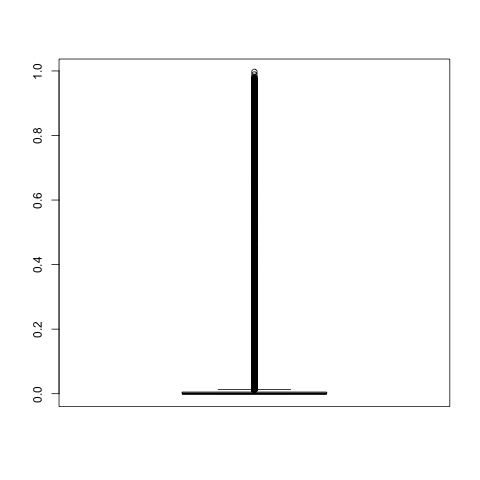

In [136]:
%%R
#################LIMPEZA DE OUTLIERS#################

boxplot(data$song_duration_ms)

boxplot(data$instrumentalness)
ggplot(data, aes(x = song_category, y = song_duration_ms)) +
  geom_boxplot() +
  labs(title = "Box plot of Your Variable by Song Category",
       x = "Song Category",
       y = "song_duration_ms")


threshold <- 1000000  # limite dos outliers (limite)
data <- data[data$song_duration_ms <= threshold, ]
dim(data)
18835-18831 ##4 outliers eliminados

In [137]:
%%R
#####Variavel acousticness

ggplot(data, aes(x = song_category, y = acousticness)) +
  geom_boxplot() +
  labs(title = "Box plot of Your Variable by Song Category",
       x = "Song Category",
       y = "Acousticness")

# Definir o limite (threshold)
threshold1 <- 0.98
data <- data[!(data$song_category == "Popular" & data$acousticness > threshold1), ]
head(data)
18835-18814 ##21 outliers eliminados

[1]

 21


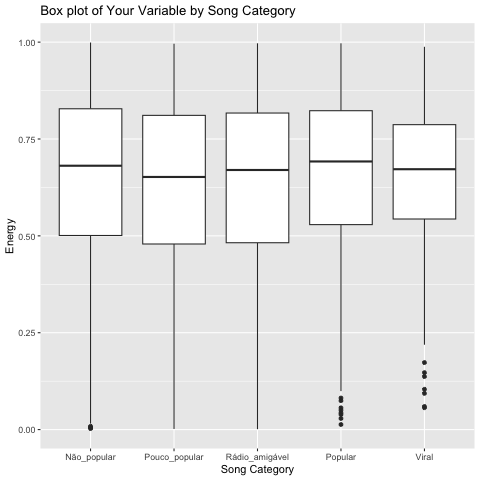

In [138]:
%%R
#####Variavel Energy
##Não é preciso eliminar outliers

ggplot(data, aes(x = song_category, y = energy
)) +
  geom_boxplot() +
  labs(title = "Box plot of Your Variable by Song Category",
       x = "Song Category",
       y = "Energy")


In [139]:
%%R
#####Variavel Speechiness

ggplot(data, aes(x = song_category, y = speechiness
)) +
  geom_boxplot() +
  labs(title = "Box plot of Your Variable by Song Category",
       x = "Song Category",
       y = "Speechiness")

threshold1 <- 0.9  
threshold2 <- 0.9 
threshold3 <- 0.75
threshold4 <- 0.5
data <- data[!(data$song_category == "Not_popular" & data$speechiness > threshold1), ]
data <- data[!(data$song_category == "Low_popularity" & data$speechiness > threshold2), ]
data <- data[!(data$song_category == "Radio_friendly" & data$speechiness > threshold3), ]
data <- data[!(data$song_category == "Popular" & data$speechiness > threshold4), ]

dim(data)
18831-18794 ##37 outliers eliminados

[1] 37


In [140]:
%%R
####Variavel Loudness

ggplot(data, aes(x = song_category, y = loudness
)) +
  geom_boxplot() +
  labs(title = "Box plot of Your Variable by Song Category",
       x = "Song Category",
       y = "Loudness")
threshold1=-35
data <- data[!(data$loudness < threshold1), ]
dim(data)
18831-18788 ##43 outliers eliminados

[1] 43


In [141]:
%%R
###Variavel Speechiness

ggplot(data, aes(x = song_category, y = speechiness
)) +
  geom_boxplot() +
  labs(title = "Box plot of Your Variable by Song Category",
       x = "Song Category",
       y = "Speechiness")

threshold1=0.85
data <- data[!(data$speechiness > threshold1), ]
dim(data)
18831-18783 ##48 outliers eliminados

[1] 48


In [142]:
%%R
##Variavel Tempo
ggplot(data, aes(x = song_category, y = tempo
)) +
  geom_boxplot() +
  labs(title = "Box plot of Your Variable by Song Category",
       x = "Song Category",
       y = "Tempo")
threshold1=230
threshold2=0
data <- data[!(data$tempo > threshold1), ]
data <- data[!(data$tempo <= threshold2), ]
dim(data)
18831-18780 ##51 outliers eliminados

[1] 51


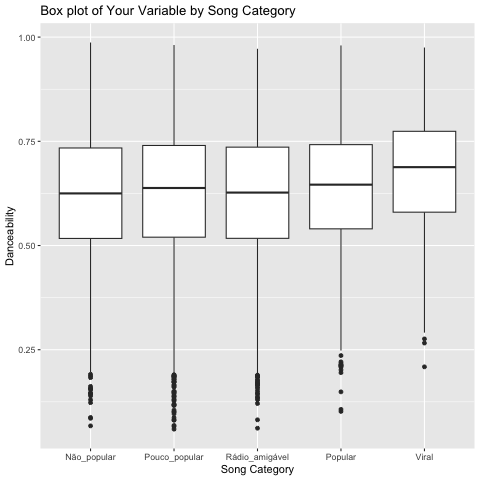

In [143]:
%%R
##Variavel Danceability
ggplot(data, aes(x = song_category, y = danceability
)) +
  geom_boxplot() +
  labs(title = "Box plot of Your Variable by Song Category",
       x = "Song Category",
       y = "Danceability")

##Não são eliminados outliers nesta variavel

In [149]:

%%R
## 51/18831 = 0.003 percentagem de elementos removidos do dataset. 
## Limpeza muito minuciosa e pormenorizada.

#### Estamos em condições de aplicar as metodologias. 

df_VAR <- data.frame(data)

  song_popularity song_duration_ms acousticness danceability energy
1              73           262333     0.005520        0.496  0.682
2              66           216933     0.010300        0.542  0.853
3              76           231733     0.008170        0.737  0.463
4              74           216933     0.026400        0.451  0.970
5              56           223826     0.000954        0.447  0.766
6              80           235893     0.008950        0.316  0.945
  instrumentalness key liveness loudness audio_mode speechiness   tempo
1         2.94e-05   8   0.0589   -4.095          1      0.0294 167.060
2         0.00e+00   3   0.1080   -6.407          0      0.0498 105.256
3         4.47e-01   0   0.2550   -7.828          1      0.0792 123.881
4         3.55e-03   0   0.1020   -4.938          1      0.1070 122.444
5         0.00e+00  10   0.1130   -5.065          1      0.0313 172.011
6         1.85e-06   4   0.3960   -3.169          0      0.1240 189.931
  time_signature aud

In [159]:
# Importar o DataFrame de R para Python
df_VAR = %R df_VAR



In [161]:
df_VAR.set_index(pd.RangeIndex(start=1, stop=len(df_VAR)+1, step=1), inplace=True)

In [162]:
df_VAR

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_category
1,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Popular
2,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Popular
3,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,Popular
4,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Popular
5,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Rádio_amigável
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14841,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300,Rádio_amigável
14842,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265,Rádio_amigável
14843,23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286,Não_popular
14844,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323,Rádio_amigável


### 6.11. <a id='toc6_11_'></a>[Gráficos comparativos da remoção dos outliers com os diferentes métodos](#toc0_)

/var/folders/km/dt_l1qsx1kvdth2cmx91yspm0000gn/T/ipykernel_27626/3737877437.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, 1].set_xticklabels(['With Outliers', 'Without Outliers'])
/var/folders/km/dt_l1qsx1kvdth2cmx91yspm0000gn/T/ipykernel_27626/3737877437.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, 1].set_xticklabels(['With Outliers', 'Without Outliers'])
/var/folders/km/dt_l1qsx1kvdth2cmx91yspm0000gn/T/ipykernel_27626/3737877437.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, 1].set_xticklabels(['With Outliers', 'Without Outliers'])
/var/folders/km/dt_l1qsx1kvdth2cmx91yspm0000gn/T/ipykernel_27626/3737877437.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, 

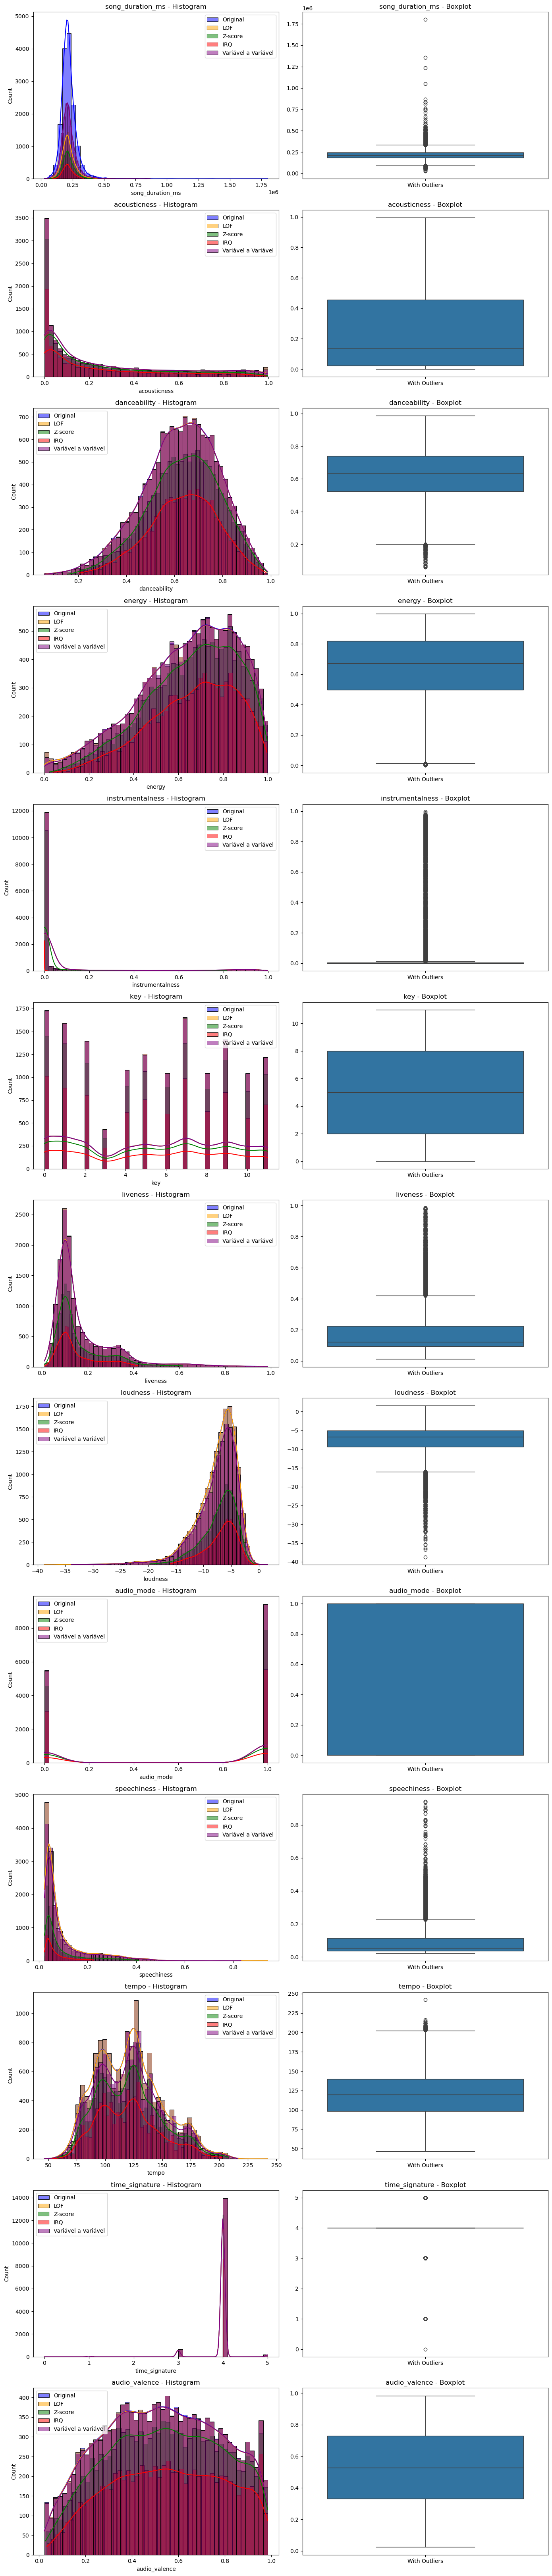

In [163]:
# Plot histograms and boxplots for each variable in a single image
variables = X.columns
num_vars = len(variables)

fig, axes = plt.subplots(num_vars, 2, figsize=(14, 5*num_vars))

for i, variable in enumerate(variables):
    # Histogram with and without outliers
    sns.histplot(X[variable], bins=50, kde=True, color='blue', ax=axes[i, 0], label='Original')
    sns.histplot(df_LOF[variable], bins=50, kde=True, color='orange', ax=axes[i, 0], label='LOF')
    sns.histplot(df_Z[variable], bins=50, kde=True, color='green', ax=axes[i, 0], label='Z-score')
    sns.histplot(df_IQR[variable], bins=50, kde=True, color='red', ax=axes[i, 0], label='IRQ')
    sns.histplot(df_VAR[variable], bins=50, kde=True, color='purple', ax=axes[i, 0], label='Variável a Variável')    
    axes[i, 0].set_title(f'{variable} - Histogram')
    axes[i, 0].legend()

    # Boxplot with and without outliers
    sns.boxplot(data=[X[variable], df_raw[variable]], ax=axes[i, 1])
    axes[i, 1].set_xticklabels(['With Outliers', 'Without Outliers'])
    axes[i, 1].set_title(f'{variable} - Boxplot')

plt.tight_layout()
plt.show()


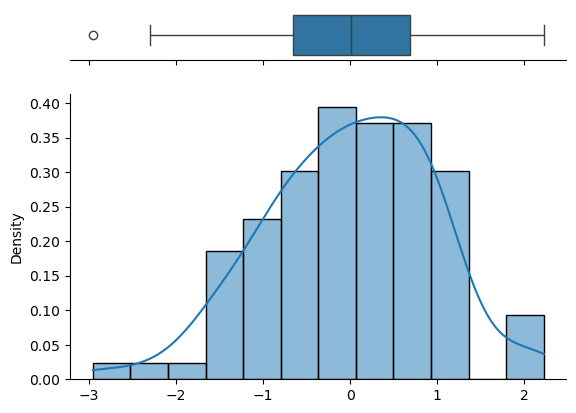

In [145]:
np.random.seed(2022)
x = np.random.randn(100)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=12, kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

### 6.12. <a id='toc6_12_'></a>[Inferência](#toc0_)

Conjunto de dados inicial: 18835 amostras.

Com o método do Intervalo Interquartil: 

Com o método do Z-score:

Com o método do Local Outlier Factor:


### 6.13. <a id='toc6_13_'></a>[Estatísticas do dataset](#toc0_)

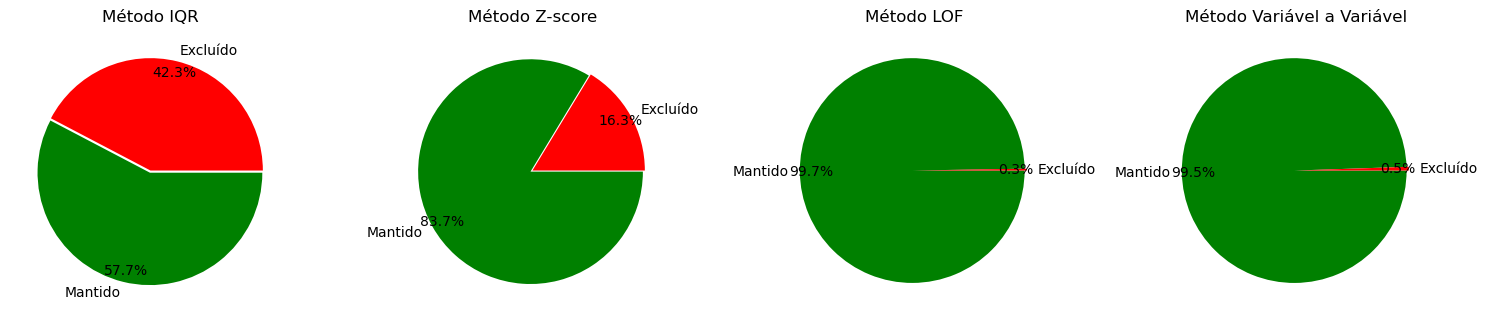

In [164]:
import matplotlib.pyplot as plt

# Definindo as cores
colors = ['green', 'red']  # Exemplo de cores: azul e laranja

fig, axes = plt.subplots(1, 4, figsize=(15, 5))  # Criando uma figura com 3 subplots

# Gráfico para df_IQR
axes[0].set_title('Método IQR')
axes[0].pie([df_IQR.shape[0], df_raw.shape[0] - df_IQR.shape[0]],
            radius=1,
            labels=['Mantido', 'Excluído'],
            counterclock=False,
            autopct='%1.1f%%',
            pctdistance=0.9,
            explode=[0.02, 0],
            shadow=False,
            colors=colors)  # Adicionando a lista de cores

# Gráfico para df_Z
axes[1].set_title('Método Z-score')
axes[1].pie([df_Z.shape[0], df_raw.shape[0] - df_Z.shape[0]],
            radius=1,
            labels=['Mantido', 'Excluído'],
            counterclock=False,
            autopct='%1.1f%%',
            pctdistance=0.9,
            explode=[0.02, 0],
            shadow=False,
            colors=colors)  # Adicionando a lista de cores

# Gráfico para df_LOF
axes[2].set_title('Método LOF')
axes[2].pie([df_LOF.shape[0], df_raw.shape[0] - df_LOF.shape[0]],
            radius=1,
            labels=['Mantido', 'Excluído'],
            counterclock=False,
            autopct='%1.1f%%',
            pctdistance=0.9,
            explode=[0.02, 0],
            shadow=False,
            colors=colors)  # Adicionando a lista de cores

# Gráfico para df_VAR
axes[3].set_title('Método Variável a Variável')
axes[3].pie([df_VAR.shape[0], df_raw.shape[0] - df_VAR.shape[0]],
            radius=1,
            labels=['Mantido', 'Excluído'],
            counterclock=False,
            autopct='%1.1f%%',
            pctdistance=0.9,
            explode=[0.02, 0],
            shadow=False,
            colors=colors)  # Adicionando a lista de cores

plt.tight_layout()  # Ajusta o layout para evitar sobreposição de legendas
plt.show()



### 6.14. <a id='toc6_14_'></a>[Divisão das variáveis dependentes e independentes](#toc0_)

In [174]:
# Splitting the data intro training & testing sets

from sklearn.model_selection import train_test_split
m=[]
for i in df_IQR.columns.values:
    m.append(i.replace(' ','_'))
    
df_IQR.columns = m
X = df_IQR[['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']]
X.loc[:, ['key', 'audio_mode', 'time_signature']] = X.loc[:, ['key', 'audio_mode', 'time_signature']].astype('category')
Y = df_IQR["song_popularity"]



In [179]:
# Splitting the data intro training & testing sets

from sklearn.model_selection import train_test_split
m=[]
for i in df_Z.columns.values:
    m.append(i.replace(' ','_'))
    
df_Z.columns = m
X = df_Z[['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']]
X.loc[:, ['key', 'audio_mode', 'time_signature']] = X.loc[:, ['key', 'audio_mode', 'time_signature']].astype('category')
Y = df_Z["song_popularity"]



In [185]:
# Splitting the data intro training & testing sets

from sklearn.model_selection import train_test_split
m=[]
for i in df_LOF.columns.values:
    m.append(i.replace(' ','_'))
    
df_LOF.columns = m
X = df_LOF[['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']]
X.loc[:, ['key', 'audio_mode', 'time_signature']] = X.loc[:, ['key', 'audio_mode', 'time_signature']].astype('category')
Y = df_LOF["song_popularity"]



In [166]:
# Splitting the data intro training & testing sets

from sklearn.model_selection import train_test_split
m=[]
for i in df_VAR.columns.values:
    m.append(i.replace(' ','_'))
    
df_VAR.columns = m
X = df_VAR[['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']]
X.loc[:, ['key', 'audio_mode', 'time_signature']] = X.loc[:, ['key', 'audio_mode', 'time_signature']].astype('category')
Y = df_VAR["song_popularity"]



## 7. <a id='toc7_'></a>[Divisão em conjunto de treino e conjunto de teste](#toc0_)

In [186]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)
Train_X.reset_index(drop=True,inplace=True)

print('Conjunto original (100%): ',X.shape,Y.shape,'\nConjunto de treino (80%): ',Train_X.shape,Train_Y.shape,'\nConjunto de teste (20%): ', Test_X.shape,'', Test_Y.shape)

Conjunto original (100%):  (14885, 13) (14885,) 
Conjunto de treino (80%):  (11908, 13) (11908,) 
Conjunto de teste (20%):  (2977, 13)  (2977,)


## 8. <a id='toc8_'></a>[Implementação de algoritmos de Aprendizagem Computacional](#toc0_)

### 8.1. <a id='toc8_1_'></a>[Random Forest](#toc0_)

#### 8.1.1. <a id='toc8_1_1_'></a>[Treino inicial do modelo](#toc0_)

In [187]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn import set_config

# Escolha RandomForestClassifier para problemas de classificação e RandomForestRegressor para regressão
model = make_pipeline(RandomForestRegressor(random_state=21))  # ou RandomForestRegressor
set_config(display='diagram')

# Treinar o modelo
model.fit(Train_X, Train_Y)

# Fazer previsões
Pred_Y = model.predict(Test_X)
model



Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(random_state=21))])

In [188]:
def modelresults(predictions):
    mae = mean_absolute_error(Test_Y, predictions)
    mse = mean_squared_error(Test_Y, predictions)
    r2 = r2_score(Test_Y, predictions)
    
    print('Erro absoluto médio do modelo: {:.4f}'.format(mae))
    print('')
    print('Erro quadrático médio do modelo: {:.4f}'.format(mse))
    print('')
    print('O valor de r2 do modelo: {:.4f}'.format(r2))

#### 8.1.2. <a id='toc8_1_2_'></a>[Esquema árvore](#toc0_)

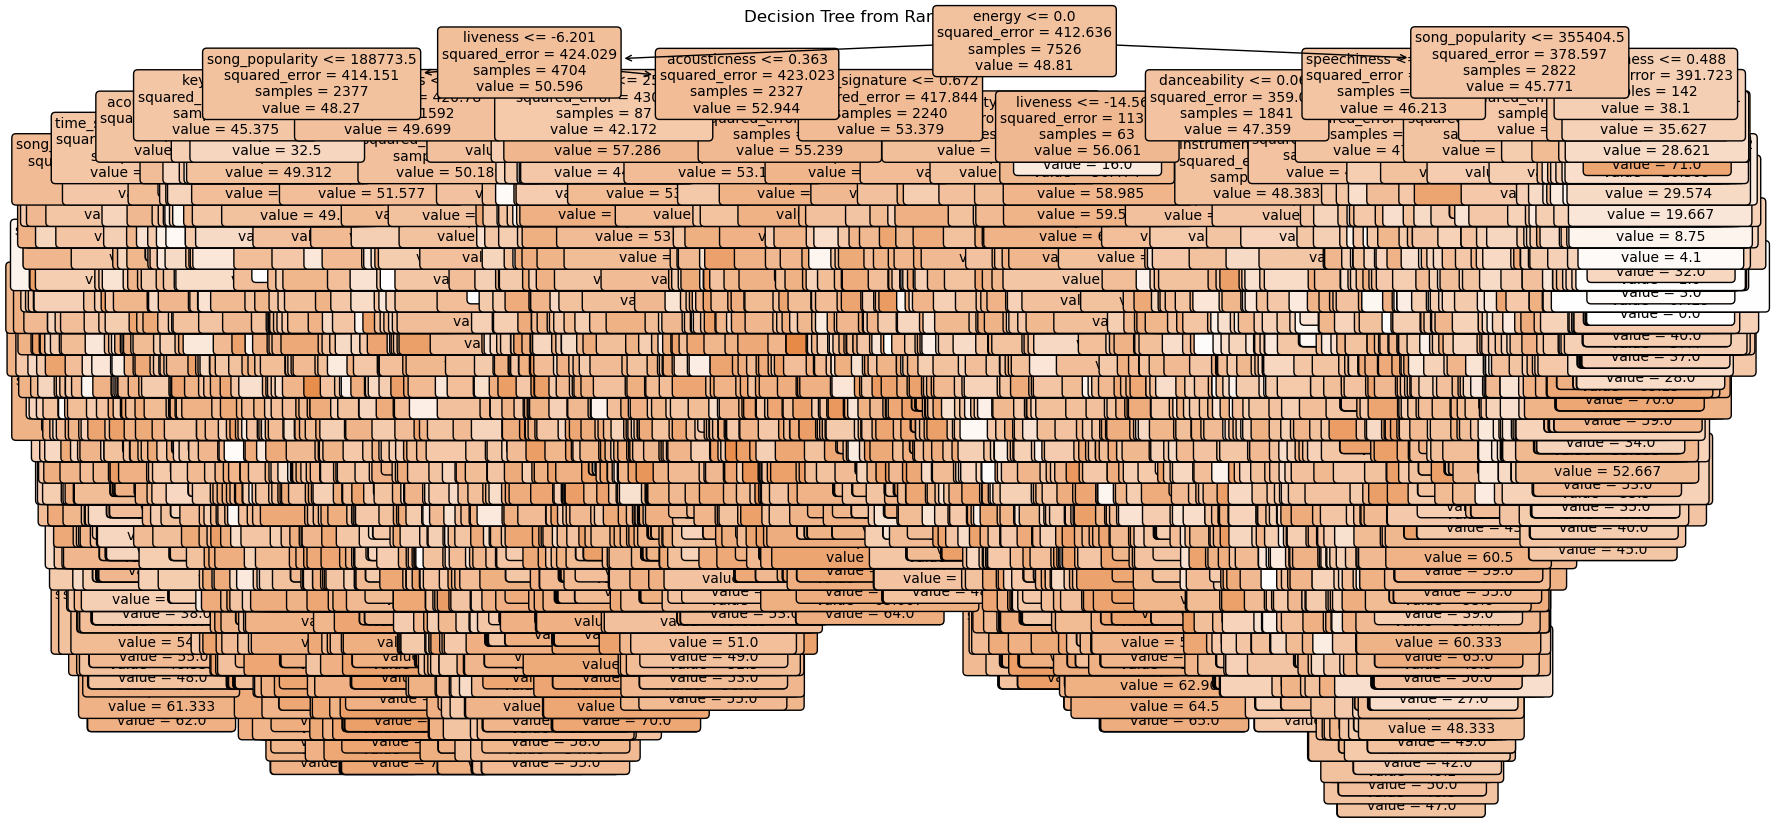

In [190]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
 
# Assuming model is your trained Pipeline
# Accessing the last step in the pipeline which should be your RandomForestRegressor
random_forest = model.steps[-1][1]

# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = random_forest.estimators_[0]
 
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df_LOF.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()


#### 8.1.3. <a id='toc8_1_3_'></a>[Performance](#toc0_)

In [189]:
modelresults(Pred_Y)

Erro absoluto médio do modelo: 16.1162

Erro quadrático médio do modelo: 414.6477

O valor de r2 do modelo: 0.0045


#### 8.1.4. <a id='toc8_1_4_'></a>[Matriz de confusão](#toc0_)

#### 8.1.5. <a id='toc8_1_5_'></a>[Afinação dos hiperparâmetros com o Grid Search Cross Validation](#toc0_)

In [191]:
param_grid = {
    'n_estimators': [100],      # Número de árvores in the forest
    'max_features': ['sqrt', 'log2'],     # Número de features a serem consideradas para divisão
    'max_depth': [None, 10],      # Profundidade máxima da árvore
    'min_samples_split': [2, 5],      # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2]         # Número mínimo de amostras num nó folha
}


#### 8.1.6. <a id='toc8_1_6_'></a>[Configurar e executar o Grid Search Cross Validation](#toc0_)

In [192]:
# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=21), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Executar o GridSearchCV
grid_search.fit(Train_X, Train_Y)

# Obter os melhores hiperparâmetros
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print(f"Melhor estimador: {best_estimator}")
print(f'Melhores hiperparâmetros: {best_params}')


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   6.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   6.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   6.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.1s
[CV] END max_depth=None,

#### 8.1.7. <a id='toc8_1_7_'></a>[Treino do modelo com os melhores hiperparâmetros](#toc0_)

In [193]:
# Criar um novo modelo com os melhores hiperparâmetros
#best_model = RandomForestClassifier(**best_params, random_state=42)  # ou RandomForestRegressor
best_model = RandomForestRegressor(**best_params, random_state=42)  # ou RandomForestRegressor

# Treinar o modelo
best_model.fit(Train_X, Train_Y)

# Fazer previsões
Best_Pred_Y = best_model.predict(Test_X)


In [194]:
modelresults(Best_Pred_Y)

Erro absoluto médio do modelo: 15.7624

Erro quadrático médio do modelo: 394.2467

O valor de r2 do modelo: 0.0535


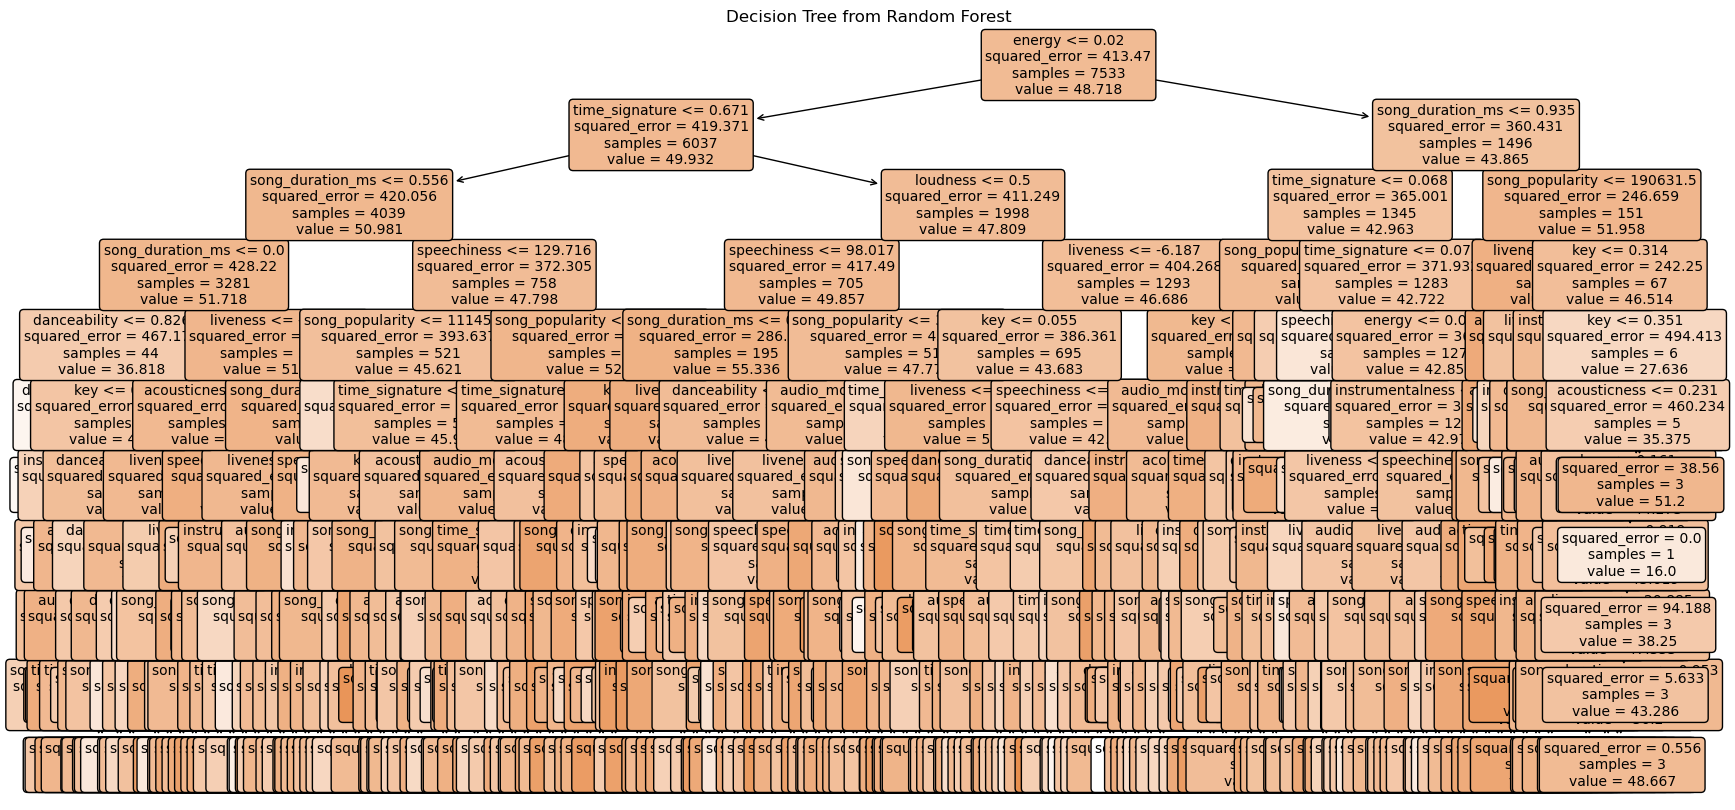

In [196]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming best_model is your trained RandomForestRegressor
random_forest = best_model

# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = random_forest.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df_LOF.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Best_Pred_Y, Pred_Y),
                              display_labels=df_LOF.columns) 
cm.plot()

### 8.2. <a id='toc8_2_'></a>[Árvore de Regressão](#toc0_)

As árvores de decisão são modelos baseados em conjunções e disjunções de regras que podem facilmente ser representadas sob a forma de uma árvore. 
Neste trabalho utiliso arvore de decisão para resolver um problema de Regressão (arvore de regressão).

Consideremos os dados "Song popularity Data" do "Kaggle", pretende-se criar um modelo preditivo da popularidade de musicas "Song popularity Data" com base em determinadas variaveis como a energia, a acustica, a instrumentalidade, a vivacidade, entre outros. A arvore de regressao é guiado pelo RMSE e não por medidas de impureza.

#### Existem diferentes pacotes para modelar com árvores de decisão. Aqui usaremos o tree.

In [276]:
%%R
library(readr) #clamar o pacote readr
install.packages("tree") #instalar o pacote tree (diz se a arvore é de classificação ou de regressão)
library(tree) #chamar o pacote tree


The downloaded binary packages are in
	/var/folders/km/dt_l1qsx1kvdth2cmx91yspm0000gn/T//RtmpqYzXIF/downloaded_packages


trying URL 'https://mirrors.cicku.me/cran/bin/macosx/big-sur-x86_64/contrib/4.3/tree_1.0-43.tgz'
Content type 'application/gzip' length 183668 bytes (179 KB)
downloaded 179 KB



In [277]:
%%R -i df_LOF
song_data <- df_LOF

In [278]:
%%R
# Vamos eliminar a primeira coluna nos dados

song_data1=song_data
head(song_data1)

  song_popularity

 song_duration_ms acousticness danceability energy
1              73           262333     0.005520        0.496  0.682
2              66           216933     0.010300        0.542  0.853
3              76           231733     0.008170        0.737  0.463
4              74           216933     0.026400        0.451  0.970
5              56           223826     0.000954        0.447  0.766
6              80           235893     0.008950        0.316  0.945
  instrumentalness key liveness loudness audio_mode speechiness   tempo
1         2.94e-05   8   0.0589   -4.095          1      0.0294 167.060
2         0.00e+00   3   0.1080   -6.407          0      0.0498 105.256
3         4.47e-01   0   0.2550   -7.828          1      0.0792 123.881
4         3.55e-03   0   0.1020   -4.938          1      0.1070 122.444
5         0.00e+00  10   0.1130   -5.065          1      0.0313 172.011
6         1.85e-06   4   0.3960   -3.169          0      0.1240 189.931
  time_signature audio_valence
1     

#### Vamos dividir o conjunto de dados em dados de treio e de teste.

In [279]:
%%R

#___________
set.seed(1234) #fazer a mesma divisão dos conjuntos de teste e
#treino sempre que se executa o código
ind.tr=sample(1:nrow(song_data1),0.8*nrow(song_data))
song.tr=song_data1[ind.tr,] #Dados para treino
song.te=song_data1[-ind.tr,] #Dados para teste


#### Ajustamos uma árvore de regressão:

In [280]:
%%R

song.tree=tree(song_popularity~.,data=song.tr) #ajusta uma árvore
summary(song.tree) # faz um resumo da árvore ajustada


Regression tree:
tree(formula = song_popularity ~ ., data = song.tr)
Variables actually used in tree construction:
[1] "instrumentalness"
Number of terminal nodes:  2 
Residual mean deviance:  409.4 = 4874000 / 11910 
Distribution of residuals:
   Min. 1st Qu. 

 Median    Mean 3rd Qu.    Max. 
-50.590 -11.590   3.415   0.000  14.410  50.870 


A função tree identificou automaticamente que se trata de um problema de regressao  e as variâveis que ganharam os nós para construir a árvore são "instrumentalness", "loudness" e "energy"  . De facto, as árvores de decisão têm esta vantagem: apenas utilizam as variáveis essenciais para resolver o problema (efetuam uma seleção de variáveis). A árvore contém 4 folhas e tem um erro de treino de cerca de 455 em Média.

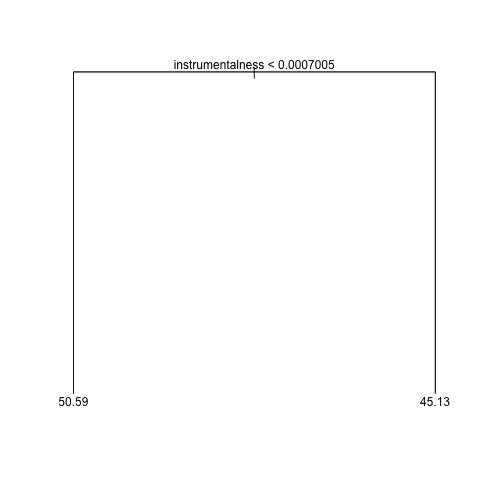

In [281]:
%%R
plot(song.tree) #Apresenta as linhas da árvore
text(song.tree,pretty=0)#acrescenta  as variáveis que ganharam cara nó e as condições

#### O PROCESSO DE PODA

Avaliamos agora a possibilidade de obter ganhos com a poda da árvore:

In [282]:
%%R
song.tree.cv=cv.tree(song.tree) #aplica o processo da poda
song.tree.cv # faz um resumo do processo aplicado

$size
[1] 2 1

$dev
[1] 4887737 4953939

$k
[1]     -Inf 78873.94

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"


Neste caso, a árvore original é a de melhor performance (ela apresenta menor erro com 4 folhas), pelo que não se aplica qualquer estratégia de poda.
Podemos assim avaliar no conjunto de teste:

In [283]:
%%R
pred=predict(song.tree,newdata=song.te) #avalia o madelo criado no conjunto de teste.
sqrt(mean((pred-song.te$song_popularity)^2))# calcula RMSE (podemos utilizar o MAPE para obter os erros em percentágens)

[1] 20.16712


#### A ÁRVIRE TMAX

Mas, e se os critérios de paragem pré-estabelecidos no R são demasiado exigentes? Poderá a árvore construída com 4 folhas não ser a melhor porque o processo de construção terminou cedo demais? Podemos sempre forçar a árvore Tmax e aplicar a estratégia de poda.

In [284]:
%%R
song.tmax=tree(song_popularity~.,data=song.tr, control = tree.control(nrow(song.tr),mindev=0.0005,minsize=2))
# mindev- controla o erro mínimo após a divisão.
#minsize-define o tamanho mínimo do nó antes da divisão.~
summary(song.tmax)# ap



Regression tree:
tree(formula = song_popularity ~ ., data = song.tr, control = tree.control(nrow(song.tr), 
    mindev = 5e-04, minsize = 2))
Number of terminal nodes:  272 
Residual mean deviance:  327.5 = 3810000 / 11640 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-58.380 -10.280   2.205   0.000  12.620  51.710 


 A árvore obtida tem 350 folhas e um erro de aproximadamente  307. Á seguir temos duas representações em que apenas uma apresenta as variáveis que ganhou cada nó.

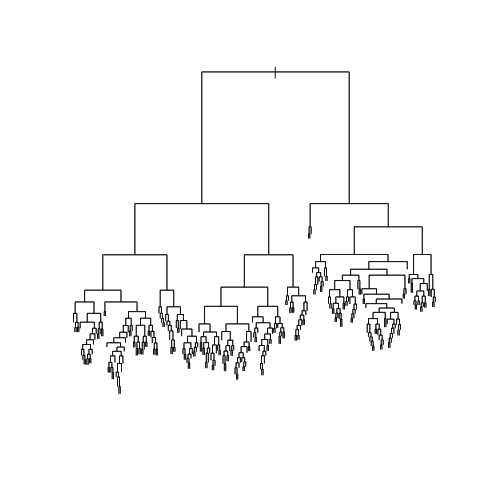

In [285]:
%%R
plot(song.tmax) #Apresenta as linhas da árvore

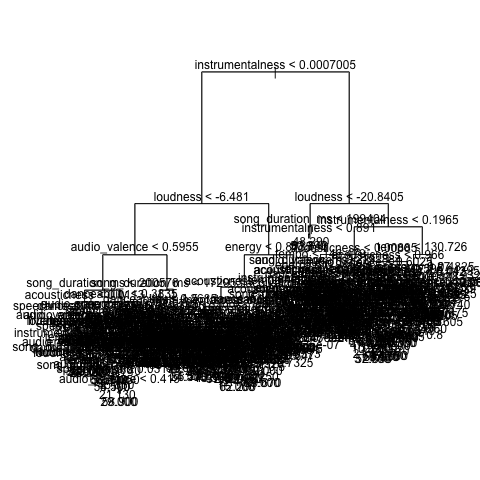

In [286]:
%%R
plot(song.tmax) #Apresenta as linhas da árvore
text(song.tmax,pretty=0)#acrescenta  as variáveis que ganharam cara nó e as condições.

#### A PODA DA ÁRVIRE TMAX

Aplicamos agora a estratégia de poda:

In [287]:
%%R
song.tmax.cv=cv.tree(song.tmax) #aplica a poda
song.tmax.cv # faz um resumo da processo de poda

$size
  [1] 272 271 270 269 268 267 266 265 264 263 261 260 259 257 256 254 252 251
 [19] 249 248 247 246 242 241 240 236 234 233 232 231 230 229 228 227 226 225
 [37] 224 222 217 216 215 214 213 210 209 208 206 205 204 202 201 200 193 189
 [55] 188 187 185 184 183 180 177 176 175 174 173 172 167 166 165 162 156 155
 [73] 154 153 152 150 149 148 147 146 142 139 138 136 135 134 133 124 120 119
 [91] 118 116 106 105 102 100  99  98  87  82  79  75  74  73  71  70  65  61
[109]  60  59  58  57  56  55  53  52  51  50  49  44  43  40  39  37  35  32
[127]  31  30  29  26  22  21  20  19  18  16  15  14  13  12  11  10   9   8
[145]   7   5   4   3   2   1

$dev
  [1] 4884884 4884884 4884884 4884884 4884884 4884884 4884884 4884884 4884884
 [10] 4884884 4884884 4884884 4884884 4884884 4884884 4884884 4884884 4884884
 [19] 4884884 4884884 4884884 4884884 4884884 4884884 4884884 4884884 4884884
 [28] 4884884 4884884 4884884 4884884 4884884 4884884 4884884 4884884 4884884
 [37] 4884884 4884884 

Como podemos observar, entre 4 e 350 folhas a quantidade de erro é sempre a mesma (6044785) tornando- se óbvio que a árvore com 4 folhas tem a mesma performance 350 folhas. Vejamos este resultado no gráfico que se segue:

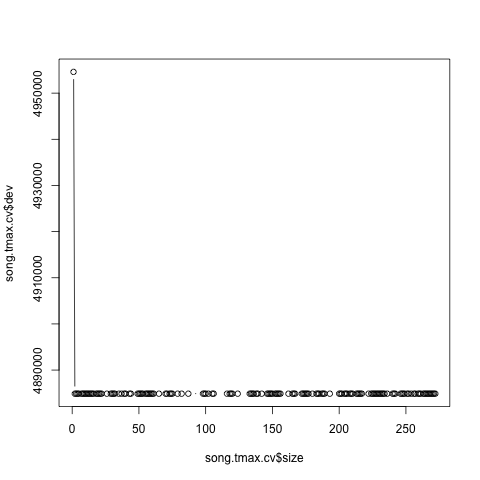

In [288]:
%%R
plot(song.tmax.cv$size,song.tmax.cv$dev,type="b")
#O comando "type" especifica o tipo de gráfico. Neste caso, "b" 
#indica que quero um gráfico de disperssão com linhas conectando
#os pontos.

Já sabemos que entre perfórmances semelhantes é preferível o modelo mais ssímples.
Portanto, devemos podar a árvore de forma que fique com apenas 4 folhas.

Vamos aplicar a poda.

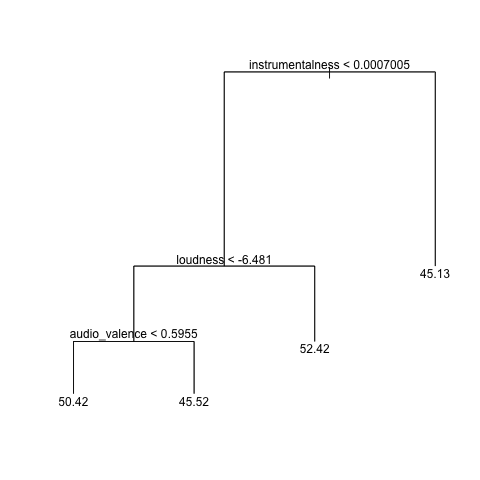

In [289]:
%%R
prune.song.tmax.tree = prune.tree(song.tmax, best = 4, method = "deviance") # aplicar a pode de forma que a árvore podada tenha 4 folhas, conforme indicado no processo.
plot(prune.song.tmax.tree) #Apresenta as linhas da árvore
text(prune.song.tmax.tree,pretty=0) #acrescenta  as variáveis que ganharam cara nó e as condições.

Cocluimos que a árvore óptima tem mesmo quatro folhas.

### 8.3. <a id='toc8_3_'></a>[Bagging](#toc0_)

In [304]:
%%R
install.packages("pls")
library(pls)
library(psych) 
library(readr)
library(tree)
library(caret)
library(gbm)
library(rpart)
library(rpart.plot)
library(randomForest)
library(caret)
library(pROC)
library(ggplot2)
library(reshape2)


The downloaded binary packages are in
	/var/folders/km/dt_l1qsx1kvdth2cmx91yspm0000gn/T//RtmpqYzXIF/downloaded_packages


trying URL 'https://mirrors.cicku.me/cran/bin/macosx/big-sur-x86_64/contrib/4.3/pls_2.8-3.tgz'
Content type 'application/gzip' length 1183010 bytes (1.1 MB)
downloaded 1.1 MB



In [305]:
%%R -i df_LOF
data <- df_LOF
data.numeric <- data[,sapply(data, is.numeric)]

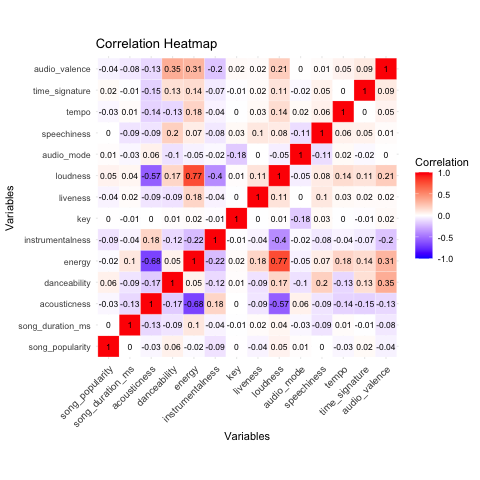

In [306]:
%%R
# Matriz de correlação

correlation_matrix <- cor(data.numeric)
correlation_data <- melt(correlation_matrix)

# Criar o heatmap com ggplot2
ggplot(correlation_data, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1,1), 
                       space = "Lab", name="Correlation") +
  geom_text(aes(label = round(value, 2)), color = "black", size = 3) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 10, hjust = 1)) +
  coord_fixed() +
  labs(title = "Correlation Heatmap", x = "Variables", y = "Variables")


# Depois de verificar a matriz de coreelação verificou-se que não há correlações
# significantes, sendo necesário fazer fazer o PC

In [307]:
%%R
### PC

pc = prcomp(data.numeric, scale. = TRUE)
pc
summary(pc)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.6762 1.2006 1.09800 1.05317 1.02078 1.00017 0.98080
Proportion of Variance 0.2007 0.1029 0.08611 0.07923 0.07443 0.07145 0.06871
Cumulative Proportion  0.2007 0.3036 0.38977 0.46899 0.54342 0.61487 0.68358
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     0.95568 0.92660 0.8949 0.87488 0.74517 0.61896 0.39150
Proportion of Variance

 0.06524 0.06133 0.0572 0.05467 0.03966 0.02737 0.01095
Cumulative Proportion  0.74882 0.81015 0.8673 0.92202 0.96169 0.98905 1.00000


In [301]:
%%R
# CATEGORIZAÇÃO DOS DADOS: foi feita de duas formas

# 1ª categorização dos dados

quartiles <- quantile(data$song_popularity, probs = c(0, 0.25, 0.5, 0.75, 0.95), na.rm = TRUE)
breaks <- c(quartiles[1:5], Inf)
labels <- c("Não_popular", "Pouco_popular", "Rádio_amigável", "Popular", "Viral")
data$song_category <- cut(data$song_popularity, breaks = breaks, labels = labels, include.lowest = TRUE)
summary(data$song_category)
data$song_popularity <- NULL
data$song_name<-NULL
head(data)

  song_duration_ms acousticness danceability energy instrumentalness key
1           262333     0.005520        0.496  0.682         2.94e-05   8
2           216933     0.010300        0.542  0.853         0.00e+00   3
3           231733     0.008170        0.737  0.463         4.47e-01   0
4           216933     0.026400        0.451  0.970         3.55e-03   0
5           223826     0.000954        0.447  0.766         0.00e+00  10
6           235893     0.008950        0.316  0.945         1.85e-06   4
  liveness loudness audio_mode speechiness   tempo time_signature audio_valence


1   0.0589   -4.095          1      0.0294 167.060              4         0.474
2   0.1080   -6.407          0      0.0498 105.256              4         0.370
3   0.2550   -7.828          1      0.0792 123.881              4         0.324
4   0.1020   -4.938          1      0.1070 122.444              4         0.198
5   0.1130   -5.065          1      0.0313 172.011              4         0.574
6   0.3960   -3.169          0      0.1240 189.931              4         0.320
   song_category
1        Popular
2        Popular
3        Popular
4        Popular
5 Rádio_amigável
6          Viral


In [308]:
%%R
# 2ª categorização dos dados

breaks <- c(0, 35, 60, 100)
labels <- c("Not_popular","Radio_friendly","Popular")
data$song_category <- cut(data$song_popularity, breaks = breaks, labels = labels, include.lowest = TRUE)
head(data)
data$song_popularity <- NULL
data$song_name<-NULL
head(data)

  song_duration_ms acousticness danceability energy instrumentalness key
1           262333     0.005520        0.496  0.682         2.94e-05   8
2           216933     0.010300        0.542  0.853         0.00e+00   3
3           231733     0.008170        0.737  0.463         4.47e-01   0
4           216933     0.026400        0.451  0.970         3.55e-03   0
5           223826     0.000954        0.447  0.766         0.00e+00  10
6           235893     0.008950        0.316  0.945         1.85e-06   4
  liveness loudness audio_mode speechiness   tempo time_signature audio_valence
1   0.0589   -4.095          1      0.0294 167.060              4         0.474
2   0.1080   -6.407          0      0.0498 105.256              4         0.370
3   0.2550   -7.828          1      0.0792 123.881              4         0.324
4   0.1020   -4.938          1      0.1070 122.444              4         0.198
5   0.1130   -5.065          1      0.0313 172.011              4         0.574
6   0.396

In [309]:
%%R

# Aplicação do BAGGING

library(randomForest)
head(data.tr)
Adv.bagg=randomForest(song_category~.,data=data.tr,mtry=(ncol(data.tr)-1))
Adv.bagg

Error in (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  : 
  object 'data.tr' not found


RInterpreterError: Failed to parse and evaluate line '\n# Aplicação do BAGGING\n\nlibrary(randomForest)\nhead(data.tr)\nAdv.bagg=randomForest(song_category~.,data=data.tr,mtry=(ncol(data.tr)-1))\nAdv.bagg\n'.
R error message: "Error in (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  : \n  object 'data.tr' not found"

In [ ]:
%%R
pred=predict(Adv.bagg,newdata=data.te,type="class")
pred1=predict(Adv.bagg,newdata=data.te,type="prob")
caret::confusionMatrix(pred,data.te$song_category)

In [ ]:
%%R
varImpPlot(Adv.bagg)

In [ ]:
%%R
head(pred1)
roc_curves <- multiclass.roc(data.te$song_category, pred1)
# Calculate AUC
auc_score <- auc(roc_curves)
# Print AUC (curva ROC)
print(auc_score)

In [ ]:
%%R
## Bagging para 2000 árvores

Adv.bagg2=randomForest(song_popularity ~ ., data = data.tr, mtry = (ncol(data.tr) - 1), ntree = 2000)
Adv.bagg2

## 9. <a id='toc9_'></a>[Resultados](#toc0_)

## 10. <a id='toc10_'></a>[Considerações finais](#toc0_)